In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import joblib

In [8]:
def plot_confusion_matrix(y_true, y_pred, labels):
    "this function plots the confusion matrix"
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g')  # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()


In [9]:
data = pd.read_csv("train_data_2.csv") ## reading data
data.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2


In [10]:
X = data.iloc[:, 0:20]
Y = data.iloc[:,-1]

print(X.iloc[0])
print(Y.iloc[0])

battery_power     842.0
blue                0.0
clock_speed         2.2
dual_sim            0.0
fc                  1.0
four_g              0.0
int_memory          7.0
m_dep               0.6
mobile_wt         188.0
n_cores             2.0
pc                  2.0
px_height          20.0
px_width          756.0
ram              2549.0
sc_h                9.0
sc_w                7.0
talk_time          19.0
three_g             0.0
touch_screen        0.0
wifi                1.0
Name: 0, dtype: float64
1


In [11]:
## Normalize data to improve model convergence 
scaler = MinMaxScaler()
# Fit and transform the data
X_nor = scaler.fit_transform(X)
X_nor[0]

array([0.22778891, 0.        , 0.68      , 0.        , 0.05263158,
       0.        , 0.08064516, 0.55555556, 0.9       , 0.14285714,
       0.1       , 0.01020408, 0.17089453, 0.61277392, 0.28571429,
       0.38888889, 0.94444444, 0.        , 0.        , 1.        ])

In [12]:
print("X shape: ", X_nor.shape)
print("Y shape: ", Y.shape)

X shape:  (1999, 20)
Y shape:  (1999,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_nor, Y, test_size=0.2, random_state=42)  ## split data to test and train data

print("x train:", X_train.shape)
print("x test:", X_test.shape)
print("y train:", y_train.shape)
print("y test:", y_train.shape)


x train: (1599, 20)
x test: (400, 20)
y train: (1599,)
y test: (1599,)


### Random Forest Classifier 

In [14]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy*100 ,"%")
print("Train Accuracy:", accuracy_score(y_train,y_pred_train)*100 ,"%")

Test Accuracy: 88.25 %
Train Accuracy: 100.0 %


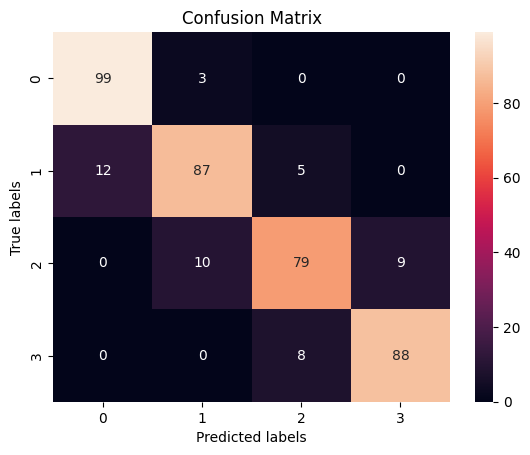

In [15]:
plot_confusion_matrix(y_test,y_pred,[0,1,2,3])

### Decision Tree Classifier

In [16]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)

y_pred = dtc_model.predict(X_test)
y_pred_train = dtc_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy*100 , '%')
print("Train Accuracy:", accuracy_score(y_train,y_pred_train)*100 , '%')

Test Accuracy: 84.5 %
Train Accuracy: 100.0 %


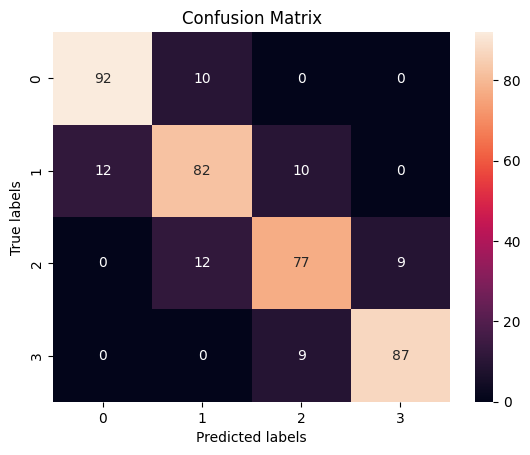

In [17]:
plot_confusion_matrix(y_test,y_pred,[0,1,2,3])

## Apply Logistic Regression

In [18]:
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the test and train data
y_pred = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy*100 , "%")


print("Train Accuracy:", accuracy_score(y_train,y_pred_train)*100 , '%')

Test Accuracy: 92.75 %
Train Accuracy: 94.24640400250156 %


c:\Users\yasme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


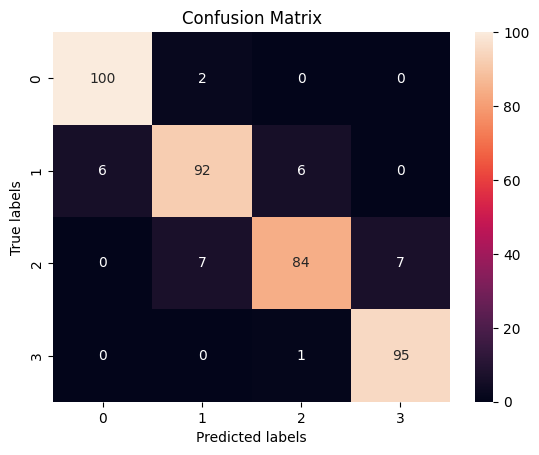

In [19]:
plot_confusion_matrix(y_test,y_pred,[0,1,2,3])

## Apply SVM Model

In [20]:
np.random.seed(42)

clfc1 = SVC(C = 1.0 ,kernel = 'linear',gamma =2.5).fit(X_train, y_train)

y_pred_svm1 = clfc1.predict(X_test)
y_train_pred_svm1 = clfc1.predict(X_train)

print("Test Accuracy: ",accuracy_score(y_test,y_pred_svm1)*100)
print("Train Accuracy: ",accuracy_score(y_train,y_train_pred_svm1)*100)

Test Accuracy:  96.25
Train Accuracy:  96.31019387116947


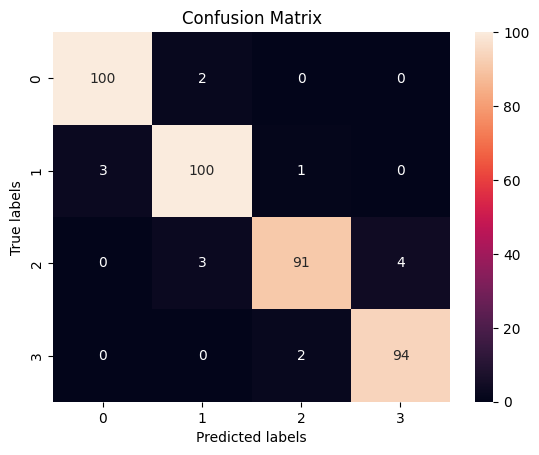

In [21]:
plot_confusion_matrix(y_test,y_pred_svm1,[0,1,2,3])

In [22]:
## As SVM gives the best results, i will consider SVM model 
joblib.dump(clfc1, 'Device_Price_classifier.pkl')

['Device_Price_classifier.pkl']